# Bike Sharing 数据集上的回归分析

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dpath = './data/'
data = pd.read_csv(dpath + 'FE_day.csv')
data.head()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0.355170,0.373517,0.828620,0.284606,0,0,0,985
1,2,1,0,0,0,1,0,0,0,0,...,0,0,0.379232,0.360541,0.715771,0.466215,0,0,0,801
2,3,1,0,0,0,1,0,0,0,0,...,0,0,0.171000,0.144830,0.449638,0.465740,0,1,0,1349
3,4,1,0,0,0,1,0,0,0,0,...,0,0,0.175530,0.174649,0.607131,0.284297,0,1,0,1562
4,5,1,0,0,0,1,0,0,0,0,...,0,0,0.209120,0.197158,0.449313,0.339143,0,1,0,1600


In [4]:
y = data.cnt
X = data.drop('cnt', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(584, 34)

In [5]:
testID = X_test['instant']

X_train.drop(['instant'], axis=1, inplace = True)
X_test.drop(['instant'], axis=1, inplace = True)

feat_names = X_train.columns

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## 1.Linear Regression without regularization
最小二乘线性回归
最小二乘没有超参数需要调优，直接用全体训练数据训练模型

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :", rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print("r2_score on Training set :", r2_score_train)
print("r2_score on Test set :", r2_score_test)

RMSE on Training set : 752.2641169543666
RMSE on Test set : 785.609115051007
r2_score on Training set : 0.8436740400232239
r2_score on Test set : 0.8548880893459053


In [8]:
lr.coef_

array([ -804.64804582,    45.68500053,    58.09108259,   700.87196269,
        -281.06463485,  -186.42363521,   238.55005026,    32.66932106,
         427.12124864,     4.08599721,  -429.2588373 ,    48.76684032,
         664.02536558,   215.19726972,  -405.00773932,  -328.66124609,
         718.86265112,   361.71909201, -1080.58174312,  -156.67384234,
        -148.1020523 ,   -53.85635947,    -9.71054887,    54.37546294,
          78.2901677 ,   235.67717232,  2815.80146724,  1075.71122802,
       -1884.93624337, -1512.25510289,  -228.90398686,   149.90065687,
        1938.70043415])

In [10]:
coefs = pd.Series(lr.coef_, index = feat_names)
coefs

season_1        -804.648046
season_2          45.685001
season_3          58.091083
season_4         700.871963
mnth_1          -281.064635
mnth_2          -186.423635
mnth_3           238.550050
mnth_4            32.669321
mnth_5           427.121249
mnth_6             4.085997
mnth_7          -429.258837
mnth_8            48.766840
mnth_9           664.025366
mnth_10          215.197270
mnth_11         -405.007739
mnth_12         -328.661246
weathersit_1     718.862651
weathersit_2     361.719092
weathersit_3   -1080.581743
weekday_0       -156.673842
weekday_1       -148.102052
weekday_2        -53.856359
weekday_3         -9.710549
weekday_4         54.375463
weekday_5         78.290168
weekday_6        235.677172
temp            2815.801467
atemp           1075.711228
hum            -1884.936243
windspeed      -1512.255103
holiday         -228.903987
workingday       149.900657
yr              1938.700434
dtype: float64

OLS picked 33 features and eliminated the other 0 features
hum            -1884.936243
windspeed      -1512.255103
weathersit_3   -1080.581743
season_1        -804.648046
mnth_7          -429.258837
mnth_11         -405.007739
mnth_12         -328.661246
mnth_1          -281.064635
holiday         -228.903987
mnth_2          -186.423635
weekday_6        235.677172
mnth_3           238.550050
weathersit_2     361.719092
mnth_5           427.121249
mnth_9           664.025366
season_4         700.871963
weathersit_1     718.862651
atemp           1075.711228
yr              1938.700434
temp            2815.801467
dtype: float64


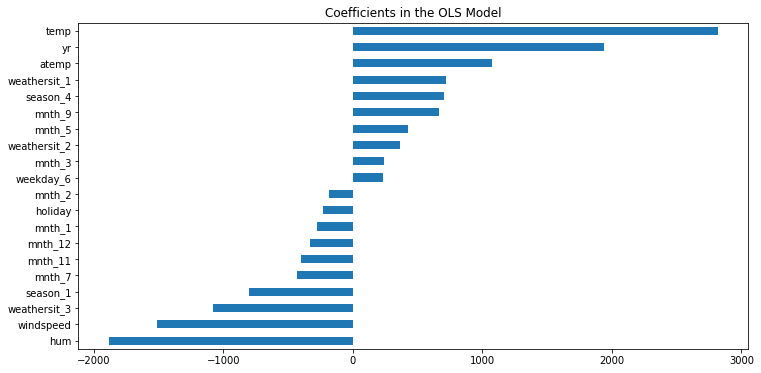

In [12]:
print("OLS picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
print(imp_coefs)

plt.figure(figsize=(12, 6))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the OLS Model")
plt.show()

系数的值非常大。由于特征之间强相关，OLS模型的性能并不好

## 2.Linear Regression with Ridge regularization (L2 penalty)

In [15]:
from sklearn.linear_model import RidgeCV

alphas = np.linspace(0.01, 50, num=100)
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)
print("Best alpha :", ridge.alpha_)

Best alpha : 1.0198989898989899


In [24]:
mse_mean = np.mean(ridge.cv_values_, axis=0)
rmse_mean = np.sqrt(mse_mean)
rmse_mean

array([804.98946948, 798.34429432, 797.95614386, 798.32478073,
       799.08045233, 800.07595173, 801.23235346, 802.50201722,
       803.85419203, 805.26808663, 806.72913145, 808.22681275,
       809.75335238, 811.30287101, 812.87084044, 814.45371517,
       816.04867867, 817.65346475, 819.26622943, 820.88545734,
       822.50989219, 824.13848447, 825.77035135, 827.40474579,
       829.04103219, 830.67866723, 832.31718444, 833.95618182,
       835.59531171, 837.23427249, 838.87280169, 840.51067032,
       842.14767805, 843.78364919, 845.41842933, 847.05188238,
       848.68388817, 850.31434029, 851.94314432, 853.57021625,
       855.19548112, 856.81887191, 858.44032848, 860.0597967 ,
       861.67722771, 863.29257726, 864.9058051 , 866.51687452,
       868.12575185, 869.73240615, 871.33680881, 872.93893329,
       874.53875486, 876.13625035, 877.731398  , 879.32417725,
       880.91456861, 882.50255352, 884.08811423, 885.67123372,
       887.25189561, 888.83008407, 890.40578377, 891.97

In [21]:
y_train_pred = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = ridge.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("RMSE on Training set :", rmse_train)
print("RMSE on Test set :" , rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print("r2_score on Training set :" , r2_score_train)
print("r2_score on Test set :" , r2_score_test)

RMSE on Training set : 754.0887759882739
RMSE on Test set : 776.9040181561336
r2_score on Training set : 0.8429147654455016
r2_score on Test set : 0.8580861545844983


Ridge picked 33 features and eliminated the other 0 features


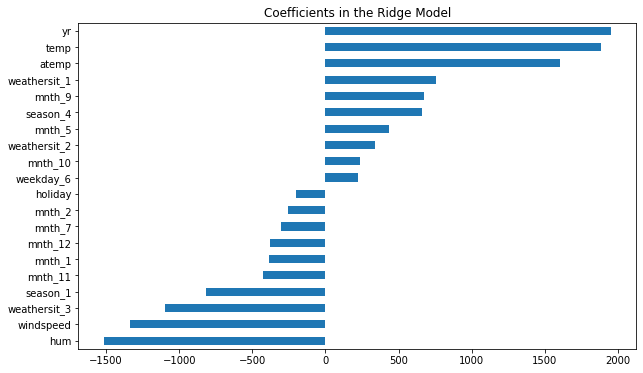

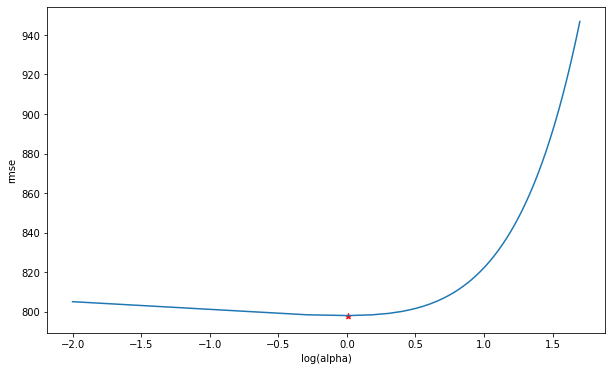

In [27]:
coefs = pd.Series(ridge.coef_, index = feat_names)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

plt.figure(figsize=(10, 6))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_mean) 
plt.scatter(np.log10(ridge.alpha_), rmse_mean[np.log10(alphas)==np.log10(ridge.alpha_)], c='r', marker='*')
plt.xlabel('log(alpha)')
plt.ylabel('rmse')
plt.show()

相比OLS，岭回归模型增加了L2正则，系数值进行了收缩。
由于增加正则限制了模型复杂度，相比OLS模型，岭回归模型在训练集上的误差略有增大，但在测试集上的误差有所减小。

## 3.Linear Regression with Lasso regularization (L1 penalty)

In [28]:
from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :" , alpha)

Best alpha : 2.336453166053946


E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [30]:
lasso.alphas_

array([539.75098518, 503.37357526, 469.44788102, 437.80866502,
       408.3018263 , 380.78364974, 355.12010619, 331.18619958,
       308.86535817, 288.04886676, 268.63533721, 250.53021457,
       233.64531661, 217.89840425, 203.21278108, 189.51691977,
       176.74411367, 164.83215195, 153.72301658, 143.36259976,
       133.70044035, 124.68947815, 116.28582464, 108.44854926,
       101.13948   ,  94.32301755,  87.96596186,  82.03735044,
        76.50830759,  71.35190372,  66.54302422,  62.0582471 ,
        57.87572895,  53.97509852,  50.33735753,  46.9447881 ,
        43.7808665 ,  40.83018263,  38.07836497,  35.51201062,
        33.11861996,  30.88653582,  28.80488668,  26.86353372,
        25.05302146,  23.36453166,  21.78984042,  20.32127811,
        18.95169198,  17.67441137,  16.48321519,  15.37230166,
        14.33625998,  13.37004404,  12.46894782,  11.62858246,
        10.84485493,  10.113948  ,   9.43230176,   8.79659619,
         8.20373504,   7.65083076,   7.13519037,   6.65

In [39]:
mse_mean = np.mean(lasso.mse_path_, axis=1)
rmse_mean = np.sqrt(mse_mean)
rmse_mean

array([1900.50547786, 1862.81149   , 1827.06897867, 1784.29618567,
       1720.50865875, 1658.6832452 , 1602.98651419, 1552.93400081,
       1508.06326872, 1467.93420787, 1432.09240454, 1398.8834745 ,
       1367.90032682, 1339.95293517, 1315.12431911, 1290.4806003 ,
       1262.69773224, 1234.67706919, 1203.13541012, 1174.64938806,
       1144.41019072, 1116.95639   , 1092.48461388, 1070.76562219,
       1051.52771194, 1034.52220276, 1019.51683744, 1006.29931636,
        994.74940185,  984.68243237,  975.83193011,  966.86126128,
        958.432518  ,  950.96813358,  944.53388534,  938.79791851,
        933.96359457,  928.59131436,  923.27330252,  918.89208423,
        914.98149283,  911.37335993,  908.2394348 ,  905.38954722,
        902.47701624,  899.72033239,  895.6868328 ,  891.38712615,
        887.68255275,  883.94939428,  880.63582787,  876.94139714,
        872.18891316,  867.92750431,  863.67591637,  859.4208311 ,
        855.6599015 ,  852.36136917,  848.91449048,  845.96429

Ridge picked 27 features and eliminated the other 6 features


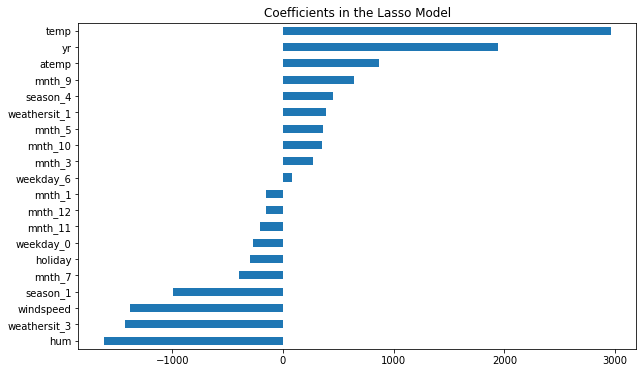

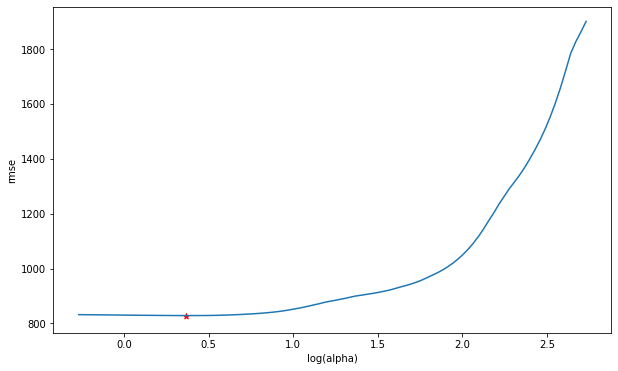

In [41]:
coefs = pd.Series(lasso.coef_, index = feat_names)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])

plt.figure(figsize=(10, 6))
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

alphas = lasso.alphas_

plt.figure(figsize=(10, 6))
plt.plot(np.log10(alphas), rmse_mean) 
plt.scatter(np.log10(lasso.alpha_), rmse_mean[np.log10(alphas)==np.log10(lasso.alpha_)], c='r', marker='*')
plt.xlabel('log(alpha)')
plt.ylabel('rmse')
plt.show()

In [43]:
#训练误差
y_train_pred = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print("RMSE on Training set :" , rmse_train)

#测试误差
y_test_pred = lasso.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE on Test set :" , rmse_test)

r2_score_train = r2_score(y_train, y_train_pred)
r2_score_test = r2_score(y_test, y_test_pred)
print("r2_score on Training set :" , r2_score_train)
print("r2_score on Test set :" , r2_score_test)

RMSE on Training set : 754.2656275844785
RMSE on Test set : 786.6230585764281
r2_score on Training set : 0.8428410764237866
r2_score on Test set : 0.8545132713117076


Lasso模型增加了L1正则，系数值进行了收缩，同时有些特征的系数为0。 在这个例子中，岭回归模型比Lasso模型性能稍好。

In [46]:
# 对测试集进行测试，生成提交文件
y_test_pred = ridge.predict(X_test)
df = pd.DataFrame({"instant":testID, 'cnt':y_test_pred})
df.to_csv(dpath + 'submission.csv')

In [47]:
df.head()

,instant,cnt
196,197,4445.330242
187,188,4714.800464
14,15,1419.777931
31,32,1070.674439
390,391,3651.194100
